# Connecting to Google Drive

In [71]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Checking folder from Drive

In [72]:
!ls '/content/drive/My Drive/Housing_Prices_Prediction/'

data.csv  data.dat  Housing_Prices_Prediction.colab  output.csv  test.csv  train.csv


#Importing needed libraries (Numpy, MatPlotLib, Pandas)

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib import cm
import matplotlib as mpl
import pandas as pd

#Reading CSV file and appending data into a pandas dataframe

In [74]:
folder_path= '/content/drive/My Drive/Housing_Prices_Prediction'
csv_path= '/content/drive/My Drive/Housing_Prices_Prediction/data.csv'
df = pd.read_csv('/content/drive/My Drive/Housing_Prices_Prediction/data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


#Splitting data into training data and testing data.
#Saving the split data into seperate files withing my folder

In [75]:

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print(f"Training Data: {train_df.shape}")
print(f"Testing Data: {test_df.shape}")

from pathlib import Path
train_filepath = Path(folder_path + '/train.csv')
test_filepath= Path(folder_path+ '/test.csv')

train_filepath.parent.mkdir(parents=True, exist_ok=True)
test_filepath.parent.mkdir(parents=True, exist_ok=True)

train_df.to_csv(train_filepath)
test_df.to_csv(test_filepath)

Training Data: (3680, 18)
Testing Data: (920, 18)


#Getting Square feet column (feature) and Price Column (label) for both training and testing data.
#Normalizing the data to 0-1 for model stability and speed


In [76]:
Sqft_Living_x = train_df['sqft_living'].values
Price_y = train_df['price'].values

# Compute min and max from the training data
temp_max = Price_y.max()
temp_min = Price_y.min()
Sqft_Living_max = Sqft_Living_x.max()
Sqft_Living_min = Sqft_Living_x.min()

# Normalize training data
Price_y = (Price_y - temp_min) / temp_max
Sqft_Living_x = (Sqft_Living_x - Sqft_Living_min) / Sqft_Living_max

Test_Price_y = test_df['price'].values
Test_Sqft_Living_x= test_df['sqft_living'].values

# Normalize test data using training data min and max
Test_Price_y = (Test_Price_y - temp_min) / temp_max
Test_Sqft_Living_x = (Test_Sqft_Living_x - Sqft_Living_min) / Sqft_Living_max

#Ploting data for visualization and printing some statistics

The Max Square feet: 0.9631474103585658
The max Price:1.0
The 1st Square feet:0.23904382470119523
The Mean of Square feet: 0.17593620084877878
The Mean of Price: 0.07714665753381182
The Median of Square feet: 0.1603585657370518
The Median of Price: 0.0656283185840708


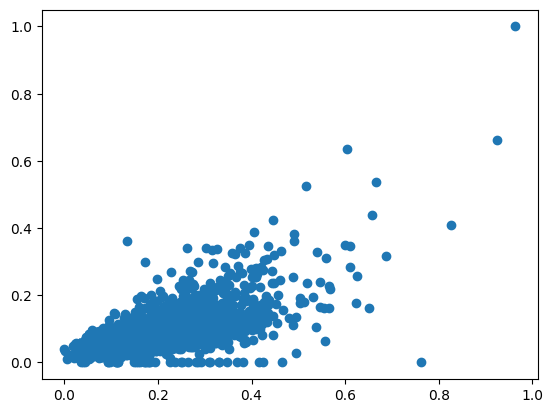

In [77]:
plt.scatter(Sqft_Living_x, Price_y)
print("The Max Square feet:", str(np.max(Sqft_Living_x)))
print("The max Price:"+ str(np.max(Price_y)))
print("The 1st Square feet:" + str(Sqft_Living_x[0]))
print("The Mean of Square feet:", Sqft_Living_x.mean())
print("The Mean of Price:", Price_y.mean())
print("The Median of Square feet:", np.median(Sqft_Living_x))
print("The Median of Price:", np.median(Price_y))

#Defining our weights starting values and writing a function to visualize our linear regression with all the data (Useful later on).

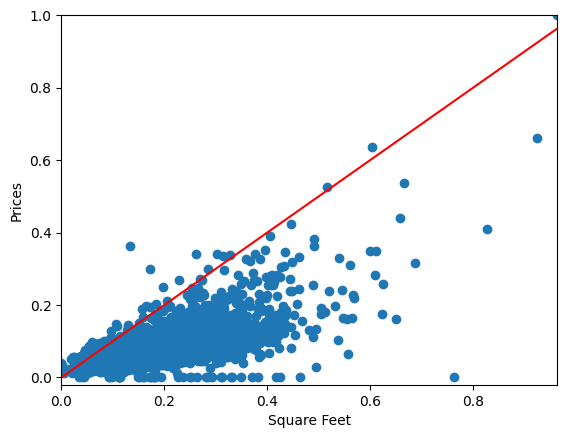

0


In [78]:
w1 = 1
b = 0
alpha =  0.2
def visualize_everything(x, y, w1, b):
    plt.scatter(Sqft_Living_x, Price_y)
    x_range = np.linspace(min(x), max(x), 2)
    y_range = w1 * x_range + b
    plt.plot(x_range, y_range, c='red')
    plt.xlabel("Square Feet")
    plt.ylabel("Prices")
    plt.xlim(min(Sqft_Living_x), max(Sqft_Living_x))
    plt.ylim(min(Price_y)-0.02, max(Price_y))
    plt.show()

visualize_everything(Sqft_Living_x, Price_y, w1, b)
print(b)

#Writing function to calculate the mean squared error of the linear regression
#Mean squared error: 1/N * Σ (w1x + w0 - y)2

In [79]:
def calculate_error(x, y, w1, b):
  err = 0
  print(type(x))

  for i in range(len(x)):
    err+= (x[i]*w1 + b - y[i])**2

  return err/len(x)

print(calculate_error(Sqft_Living_x, Price_y, w1, b))
print(b)

<class 'numpy.ndarray'>
0.014797928423964843
0


#Writing function to calculate the gradient of each weight. This is an preliminary step to writting an update rule for each weight.
#Update rule for w1: w1 (new) = w1 (old) - α * 2 * (w1x + w0- y) * x
#Update rule for w0: w0 (new) = w0 (old) - α * 2 * (w1x + w0- y)

In [80]:
def gradient_w1(x, y, w1, b):
  gradient = 0

  for i in range(len(x)):
    gradient+= (2*(w1*x[i] + b-y[i]))*x[i]


  return gradient/len(x)

def gradient_b(x, y, w1, b):
  gradient = 0

  for i in range(len(x)):
    gradient+= 2*(w1*x[i] + b-y[i])


  return gradient/len(x)


print(gradient_w1(Sqft_Living_x, Price_y, 100, 50), gradient_b(Sqft_Living_x, Price_y, 100, 50))
print(b)

25.573432140448233 135.03294685468833
0


#Training the model (Learning and applying update rules to minimize loss).

0


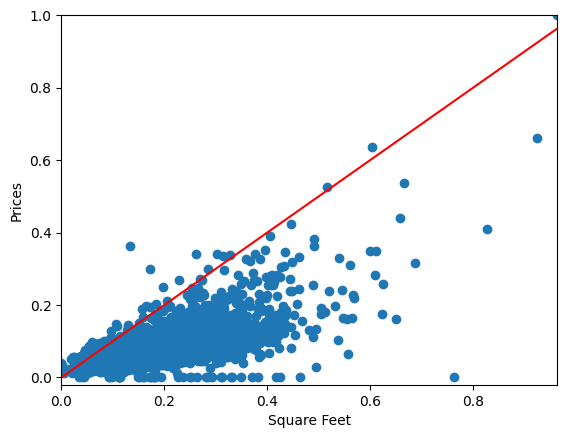

<class 'numpy.ndarray'>
Step  0 :  Error is  0.00826
<class 'numpy.ndarray'>
Step  1 :  Error is  0.00599
<class 'numpy.ndarray'>
Step  2 :  Error is  0.00519
<class 'numpy.ndarray'>
Step  3 :  Error is  0.0049
<class 'numpy.ndarray'>
Step  4 :  Error is  0.00478
<class 'numpy.ndarray'>
Step  5 :  Error is  0.00473
<class 'numpy.ndarray'>
Step  6 :  Error is  0.00469
<class 'numpy.ndarray'>
Step  7 :  Error is  0.00467
<class 'numpy.ndarray'>
Step  8 :  Error is  0.00464
<class 'numpy.ndarray'>
Step  9 :  Error is  0.00462
<class 'numpy.ndarray'>
Step  10 :  Error is  0.0046
<class 'numpy.ndarray'>
Step  11 :  Error is  0.00458
<class 'numpy.ndarray'>
Step  12 :  Error is  0.00456
<class 'numpy.ndarray'>
Step  13 :  Error is  0.00454
<class 'numpy.ndarray'>
Step  14 :  Error is  0.00451
<class 'numpy.ndarray'>
Step  15 :  Error is  0.00449
<class 'numpy.ndarray'>
Step  16 :  Error is  0.00447
<class 'numpy.ndarray'>
Step  17 :  Error is  0.00445
<class 'numpy.ndarray'>
Step  18 :  Erro

In [81]:
print(b)
visualize_everything(Sqft_Living_x, Price_y, w1, b)


for i in range(1000):
  temp= w1
  w1-=(alpha *gradient_w1(Sqft_Living_x, Price_y, w1, b))
  b-=(alpha* gradient_b(Sqft_Living_x, Price_y, temp, b))

  #plt.plot([-0.5, 1], [-0.5 * w1 + b, 1* w1 + b], c = cm.get_cmap('viridis')((i+1)/100))

  print("Step ", i, ":  Error is ", round(calculate_error(Sqft_Living_x, Price_y, w1, b), 5))


print("y= " + str(w1)+"x + " + str(b))

#Testing accuracy of model on our first training data

In [82]:
# Convert the actual normalized price back to the original scale
original_actual_price = (Price_y[0] * temp_max) + temp_min
print("Actual value: ", original_actual_price)

# Convert the predicted normalized price back to the original scale
# Assuming `w1` and `b` are the parameters from your model
original_predicted_price = ((Sqft_Living_x[0] * w1 + b) * temp_max) + temp_min
print("Predicted value: ", original_predicted_price)

Actual value:  685000.0
Predicted value:  721747.6738694013


#Testing accuracy of model on a random testing data

Actual value:  653000.0
Predicted value:  587586.5447958695


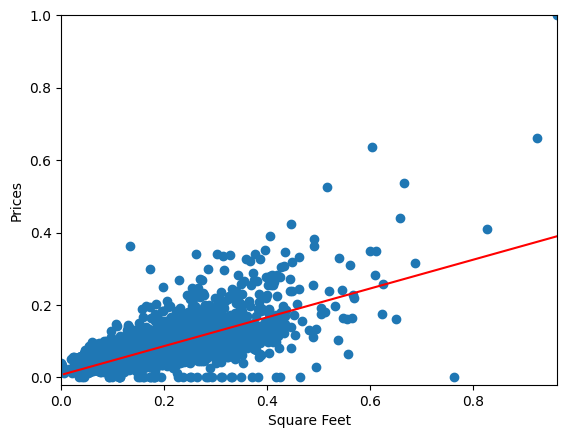

In [83]:
import random
num= random.randrange(0, len(Test_Sqft_Living_x)-1)
# Calculate and print Mean Squared Error
#print("Mean Squared Error: ", calculate_error(Test_Sqft_Living_x, Test_Price_y, w1, b))

# Convert the actual price from normalized back to original scale
actual_value_original = (Test_Price_y[num] * temp_max) + temp_min
print("Actual value: ", actual_value_original)

# Calculate and convert the predicted value from normalized back to original scale
predicted_value_normalized = (Test_Sqft_Living_x[num] * w1 + b)
predicted_value_original = (predicted_value_normalized * temp_max) + temp_min
print("Predicted value: ", predicted_value_original)

# Visualize the results
visualize_everything(Test_Sqft_Living_x, Test_Price_y, w1, b)


#Adding More Features (Condition 0-5, Number of bedrooms 1-8)

In [84]:
Condition_x = train_df['condition'].values
Bedrooms_x = train_df['bedrooms'].values

# Compute min and max from the training data
Condition_max = Condition_x.max()
Condition_min = Condition_x.min()
Bedrooms_max = Bedrooms_x.max()
Bedrooms_min = Bedrooms_x.min()

# Normalize training data
Condition_x = (Condition_x - Condition_min) / Condition_max
Bedrooms_x = (Bedrooms_x - Bedrooms_min) / Bedrooms_max

Test_Condition_x = test_df['condition'].values
Test_Bedrooms_x= test_df['bedrooms'].values

# Normalize test data using training data min and max
Test_Condition_x = (Test_Condition_x - Condition_min) / Condition_max
Test_Bedrooms_x = (Test_Bedrooms_x - Bedrooms_min) / Bedrooms_max

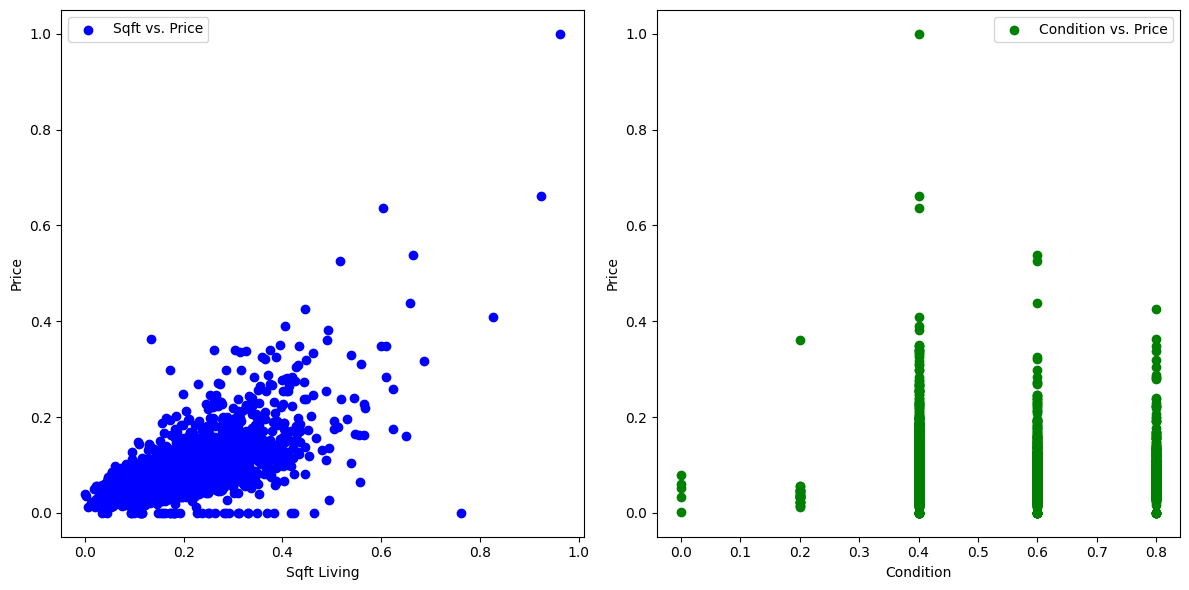

In [85]:
import matplotlib.pyplot as plt

# Plot Sqft_Living_x vs. Price_y
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(Sqft_Living_x, Price_y, c='blue', label='Sqft vs. Price')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.legend()

# Plot Condition_x vs. Price_y
plt.subplot(1, 2, 2)
plt.scatter(Condition_x, Price_y, c='green', label='Condition vs. Price')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()


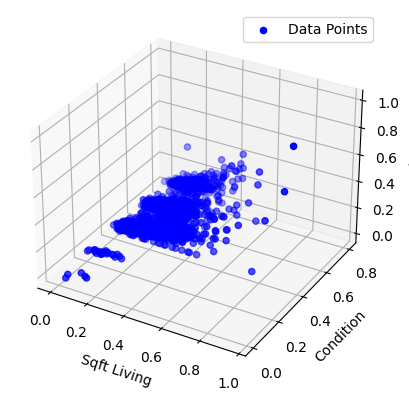

In [86]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Sqft_Living_x, Condition_x, Price_y, c='blue', label='Data Points')
ax.set_xlabel('Sqft Living')
ax.set_ylabel('Condition')
ax.set_zlabel('Price')
ax.legend()

plt.show()


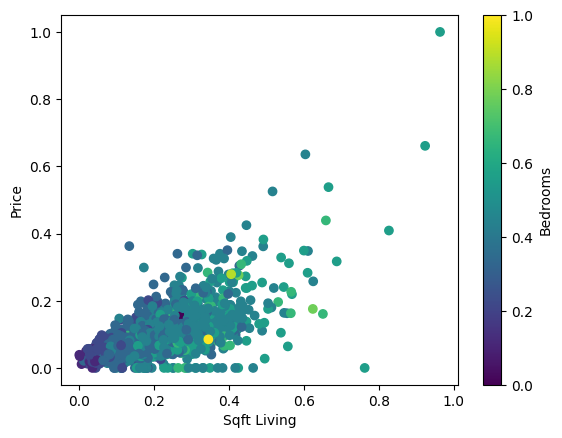

In [87]:
import matplotlib.pyplot as plt

scatter = plt.scatter(Sqft_Living_x, Price_y, c=Bedrooms_x, cmap='viridis')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.colorbar(label='Bedrooms')
plt.show()


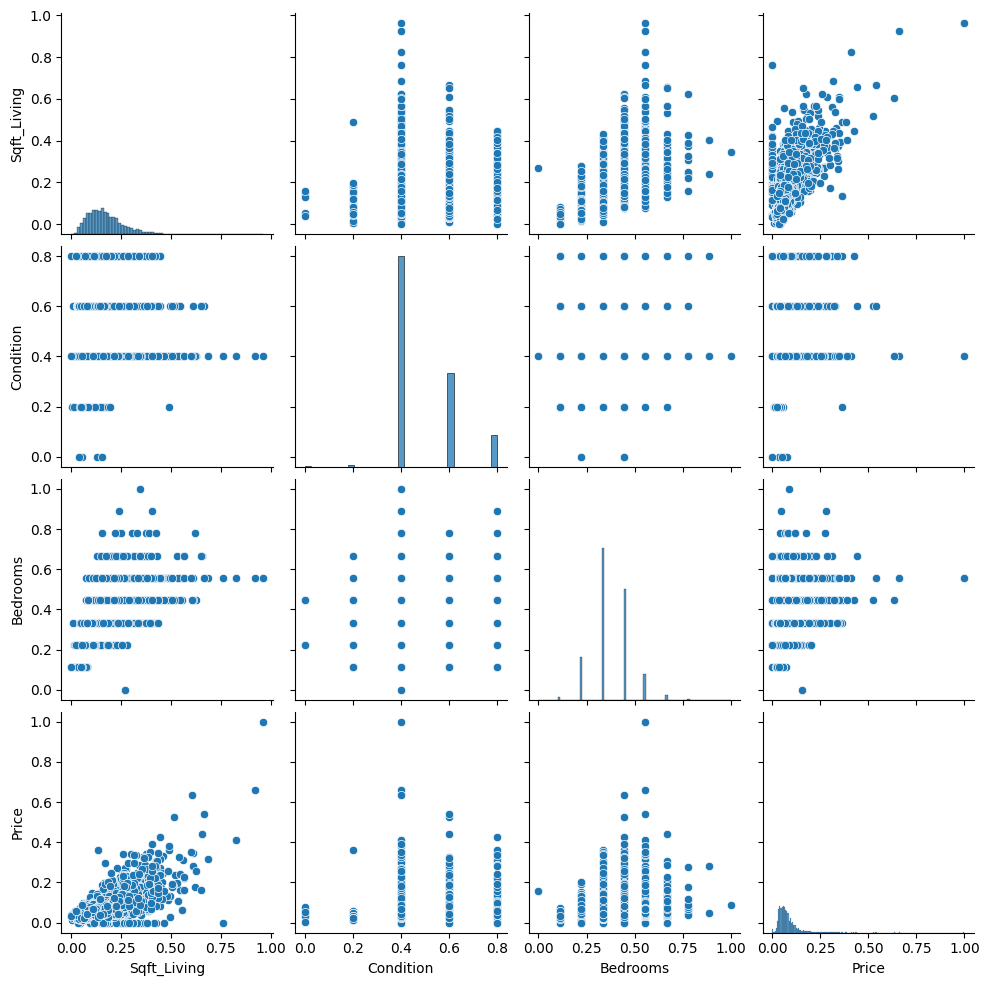

In [88]:
import seaborn as sns
import pandas as pd

# Create a DataFrame
df = pd.DataFrame({
    'Sqft_Living': Sqft_Living_x,
    'Condition': Condition_x,
    'Bedrooms': Bedrooms_x,
    'Price': Price_y
})

sns.pairplot(df)
plt.show()


#Sum squared error: 1/N * Σ (w1x1 + w2x2 + w3x3 + w0 - y)^2

In [89]:
w2=1
w3=1
def calculate_error2(x1,x2, x3,  y, w1, w2, w3, b):
  err = 0
  print(type(x3))

  for i in range(len(x1)):
    err+= (x1[i]*w1 + x2[i]*w2 + x3[i]*w3 + b - y[i])**2

  return err/len(x1)

print(calculate_error2(Sqft_Living_x, Condition_x, Bedrooms_x, Price_y, w1, w2, w3, b))

<class 'numpy.ndarray'>
0.7832106223934636


#Calculating the gradients for all the weights

In [112]:
alpha = 0.1
w1 = 0.4363187746795462
w2 = 0.03888087574749459
w3 = -0.0837265155361674
b = 0.012844606260358804
#Outputs from the last time I trained my model
#y = 0.4363187746795462x1 + 0.03888087574749459x2 + -0.0837265155361674x3 + 0.012844606260358804
def gradient_w1(x1, x2, x3, y, w1, w2, w3, b):
    gradient = 0
    for i in range(len(x1)):
        gradient += (2 * (w1 * x1[i] + w2 * x2[i] + w3 * x3[i] + b - y[i])) * x1[i]
    return gradient / len(x1)

def gradient_w2(x1, x2, x3, y, w1, w2, w3, b):
    gradient = 0
    for i in range(len(x2)):
        gradient += (2 * (w1 * x1[i] + w2 * x2[i] + w3 * x3[i] + b - y[i])) * x2[i]
    return gradient / len(x2)

def gradient_w3(x1, x2, x3, y, w1, w2, w3, b):
    gradient = 0
    for i in range(len(x3)):
        gradient += (2 * (w1 * x1[i] + w2 * x2[i] + w3 * x3[i] + b - y[i])) * x3[i]
    return gradient / len(x3)

def gradient_b(x1, x2, x3, y, w1, w2, w3, b):
    gradient = 0
    for i in range(len(x1)):
        gradient += 2 * (w1 * x1[i] + w2 * x2[i] + w3 * x3[i] + b - y[i])
    return gradient / len(x1)



#Training the model

In [113]:
for i in range(5000):
    # Update weights and bias
    w1 -= (alpha * gradient_w1(Sqft_Living_x, Condition_x, Bedrooms_x, Price_y, w1, w2, w3, b))
    w2 -= (alpha * gradient_w2(Sqft_Living_x, Condition_x, Bedrooms_x, Price_y, w1, w2, w3, b))
    w3 -= (alpha * gradient_w3(Sqft_Living_x, Condition_x, Bedrooms_x, Price_y, w1, w2, w3, b))
    b -= (alpha * gradient_b(Sqft_Living_x, Condition_x, Bedrooms_x, Price_y, w1, w2, w3, b))

    # Calculate and print the error
    error = calculate_error2(Sqft_Living_x, Condition_x, Bedrooms_x, Price_y, w1, w2, w3, b)
    print("Step ", i, ":  Error is ", round(error, 5))

print("y = " + str(w1) + "x1 + " + str(w2) + "x2 + " + str(w3) + "x3 + " + str(b))

Streaming output truncated to the last 5000 lines.
Step  2500 :  Error is  0.00146
<class 'numpy.ndarray'>
Step  2501 :  Error is  0.00146
<class 'numpy.ndarray'>
Step  2502 :  Error is  0.00146
<class 'numpy.ndarray'>
Step  2503 :  Error is  0.00146
<class 'numpy.ndarray'>
Step  2504 :  Error is  0.00146
<class 'numpy.ndarray'>
Step  2505 :  Error is  0.00146
<class 'numpy.ndarray'>
Step  2506 :  Error is  0.00146
<class 'numpy.ndarray'>
Step  2507 :  Error is  0.00146
<class 'numpy.ndarray'>
Step  2508 :  Error is  0.00146
<class 'numpy.ndarray'>
Step  2509 :  Error is  0.00146
<class 'numpy.ndarray'>
Step  2510 :  Error is  0.00146
<class 'numpy.ndarray'>
Step  2511 :  Error is  0.00146
<class 'numpy.ndarray'>
Step  2512 :  Error is  0.00146
<class 'numpy.ndarray'>
Step  2513 :  Error is  0.00146
<class 'numpy.ndarray'>
Step  2514 :  Error is  0.00146
<class 'numpy.ndarray'>
Step  2515 :  Error is  0.00146
<class 'numpy.ndarray'>
Step  2516 :  Error is  0.00146
<class 'numpy.ndarray

#Testing the Model

In [134]:
import random
num= random.randrange(0, len(Test_Sqft_Living_x)-1)
num=556
# Calculate and print Mean Squared Error
#print("Mean Squared Error: ", calculate_error(Test_Sqft_Living_x, Test_Price_y, w1, b))

# Convert the actual price from normalized back to original scale
actual_value_original = (Test_Price_y[num] * temp_max) + temp_min
print("Actual value: ", actual_value_original)

# Calculate and convert the predicted value from normalized back to original scale
predicted_value_normalized = ((Test_Sqft_Living_x[num] * w1) + (Test_Condition_x[num]*w2) + (Test_Bedrooms_x[num]*w3)  + b)
predicted_value_original = (predicted_value_normalized * temp_max) + temp_min
print("Predicted value: ", predicted_value_original)
print("Random Number: ", num)

Actual value:  328000.0
Predicted value:  331530.2495998481
Random Number:  556
